In [1]:
import yaml

In [151]:
events = '''
  events:
    - name: A
      type: person
      values: 
        - name: person_id
          type: seq
        - name: gender_concept_id
          type: list
          params: 
          - val: 8532
            prob: 0.45
          - val: 8157
            prob: 0.55
        - name: age
          type: dist
          params: 
            mean: 70
            std: 0.45
    - name: B
      type: visit_occurrence
      values: 
        - name: person_id
          type: parent
        - name: visit_occurrence_id
          type: seq     
        - name: visit_datetime
          type: date 
        - name: visit_concept_id
          type: list
          params: 
          - val: 9203
            prob: 0.15
          - val: 9201
            prob: 0.85  
    - name: C
      type: condition_occurrence
      values: 
        - name: person_id
          type: parent
        - name: visit_occurrence_id
          type: parent       
        - name: condition_start_date
          type: parent  
          params:
            field: visit_datetime
        - name: condition_concept_id
          type: list
          params: 
          - val: 13577
            prob: 0.15
          - val: 13568
            prob: 0.85    
    - name: D
      type: condition_occurrence
      values: 
        - name: condition_concept_id
          type: list
          params: 
          - val: 13577
            prob: 0.15
          - val: 13568
            prob: 0.85  
  transitions:
    - a: null
      b: A
      p: 1
    - a: A
      b: B
      p: 1
    - a: B
      b: C
      p: 0.15
    - a: B
      b: D
      p: 0.85

'''

In [152]:
yaml.load(events, yaml.Loader)

{'events': [{'name': 'A',
   'type': 'person',
   'values': [{'name': 'person_id', 'type': 'seq'},
    {'name': 'gender_concept_id',
     'type': 'list',
     'params': [{'val': 8532, 'prob': 0.45}, {'val': 8157, 'prob': 0.55}]},
    {'name': 'age', 'type': 'dist', 'params': {'mean': 70, 'std': 0.45}}]},
  {'name': 'B',
   'type': 'visit_occurrence',
   'values': [{'name': 'person_id', 'type': 'parent'},
    {'name': 'visit_occurrence_id', 'type': 'seq'},
    {'name': 'visit_datetime', 'type': 'date'},
    {'name': 'visit_concept_id',
     'type': 'list',
     'params': [{'val': 9203, 'prob': 0.15}, {'val': 9201, 'prob': 0.85}]}]},
  {'name': 'C',
   'type': 'condition_occurrence',
   'values': [{'name': 'person_id', 'type': 'parent'},
    {'name': 'visit_occurrence_id', 'type': 'parent'},
    {'name': 'condition_start_date',
     'type': 'parent',
     'params': {'field': 'visit_datetime'}},
    {'name': 'condition_concept_id',
     'type': 'list',
     'params': [{'val': 13577, 'prob

In [153]:
class Synthea():
    def __init__(self, conf=None):
        if events:
            config = yaml.load(conf, yaml.Loader)
            self.config = conf
            self.events = config['events']
            self.transitions = config['transitions']            
        else:
            self.conf = ''
            self.events = []
            self.transitions = []
    def get_event(self, name):
        return [e for e in self.events if e['name'] == name][0]
    def list_events(self):
        return [e['name'] for e in self.events]
    def list_transitions(self):
        return [f"{e['a']} -> {e['b']} ({e['p']})" for e in self.transitions]
    def list_edges(self, p=False):
        if p:
            return [(e['a'], e['b'], e['p']) for e in self.transitions if e['a'] and e['b']]
        else:
            return [(e['a'], e['b']) for e in self.transitions if e['a'] and e['b']]

In [154]:
synth = Synthea(events)
    

In [155]:
synth.list_events()

['A', 'B', 'C', 'D']

In [156]:
synth.list_transitions()

['None -> A (1)', 'A -> B (1)', 'B -> C (0.15)', 'B -> D (0.85)']

In [157]:
synth.list_edges()

[('A', 'B'), ('B', 'C'), ('B', 'D')]

In [158]:
synth.get_event('A')

{'name': 'A',
 'type': 'person',
 'values': [{'name': 'person_id', 'type': 'seq'},
  {'name': 'gender_concept_id',
   'type': 'list',
   'params': [{'val': 8532, 'prob': 0.45}, {'val': 8157, 'prob': 0.55}]},
  {'name': 'age', 'type': 'dist', 'params': {'mean': 70, 'std': 0.45}}]}

In [159]:
synth.transitions[0].get('n', 1)

1

In [160]:
import networkx as nx

G = nx.Graph()

In [161]:
G.add_nodes_from(synth.list_events())

In [162]:
G.add_edges_from(synth.list_edges())

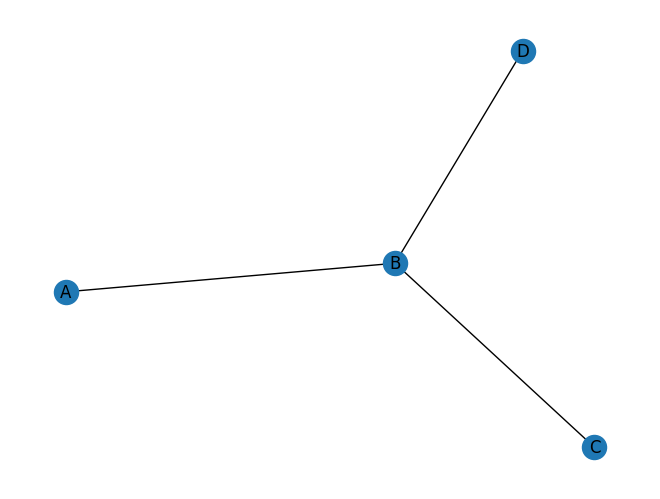

In [163]:
pos = nx.nx_agraph.graphviz_layout(G)

nx.draw(G, pos=pos, with_labels=True)

In [164]:
DG = nx.DiGraph()

In [165]:
DG.add_weighted_edges_from(synth.list_edges(True))

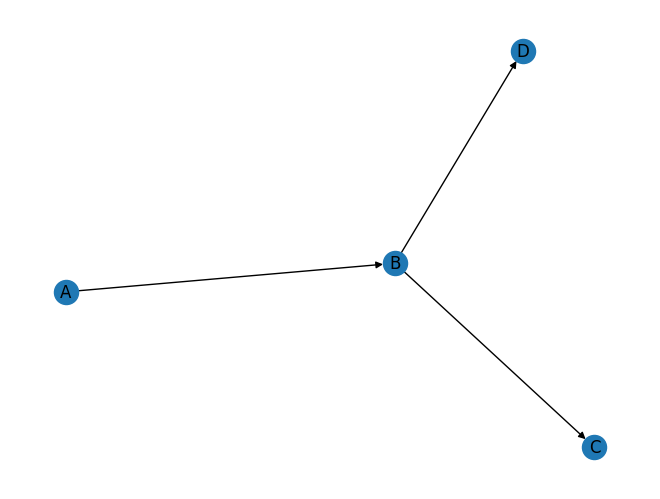

In [166]:
nx.draw(DG, pos=pos, with_labels=True)

In [167]:
patient = {}

In [168]:
for n in synth.list_events():
    node = synth.get_event(n)
    print(node)

{'name': 'A', 'type': 'person', 'values': [{'name': 'person_id', 'type': 'seq'}, {'name': 'gender_concept_id', 'type': 'list', 'params': [{'val': 8532, 'prob': 0.45}, {'val': 8157, 'prob': 0.55}]}, {'name': 'age', 'type': 'dist', 'params': {'mean': 70, 'std': 0.45}}]}
{'name': 'B', 'type': 'visit_occurrence', 'values': [{'name': 'person_id', 'type': 'parent'}, {'name': 'visit_occurrence_id', 'type': 'seq'}, {'name': 'visit_datetime', 'type': 'date'}, {'name': 'visit_concept_id', 'type': 'list', 'params': [{'val': 9203, 'prob': 0.15}, {'val': 9201, 'prob': 0.85}]}]}
{'name': 'C', 'type': 'condition_occurrence', 'values': [{'name': 'person_id', 'type': 'parent'}, {'name': 'visit_occurrence_id', 'type': 'parent'}, {'name': 'condition_start_date', 'type': 'parent', 'params': {'field': 'visit_datetime'}}, {'name': 'condition_concept_id', 'type': 'list', 'params': [{'val': 13577, 'prob': 0.15}, {'val': 13568, 'prob': 0.85}]}]}
{'name': 'D', 'type': 'condition_occurrence', 'values': [{'name':

In [169]:
print(yaml.dump({'person':{'gender_concept_id':8532, 'person_id': 1}}))

person:
  gender_concept_id: 8532
  person_id: 1



In [170]:
seq = {}

In [171]:
seq['person'] = seq.get('person', 0) +1

In [172]:
seq

{'person': 1}

In [173]:
import random

In [174]:
def get_choices(node):
    return [a['val'] for a in node['params']], [a['prob'] for a in node['params']]

In [180]:
ehr = {}

In [181]:
for n in synth.list_events():
    node = synth.get_event(n)
    table = node['type']
    for val in node['values']:
        print(val)
        field = val['name']
        if val['type'] == 'list':
            value = random.choices(*get_choices(val))[0]
        elif val['type'] == 'dist':
            value = ( random.random() * val['params']['std'] ) + val['params']['mean']
        elif val['type'] == 'seq':
            value = seq[field] = seq.get(field, 0) +1
        else:
            break

        fields = ehr.get(table, [])
        fields.append({field:value})
        ehr[table] = fields

{'name': 'person_id', 'type': 'seq'}
{'name': 'gender_concept_id', 'type': 'list', 'params': [{'val': 8532, 'prob': 0.45}, {'val': 8157, 'prob': 0.55}]}
{'name': 'age', 'type': 'dist', 'params': {'mean': 70, 'std': 0.45}}
{'name': 'person_id', 'type': 'parent'}
{'name': 'person_id', 'type': 'parent'}
{'name': 'condition_concept_id', 'type': 'list', 'params': [{'val': 13577, 'prob': 0.15}, {'val': 13568, 'prob': 0.85}]}


In [182]:
ehr

{'person': [{'person_id': 3},
  {'gender_concept_id': 8157},
  {'age': 70.14409999775198}],
 'condition_occurrence': [{'condition_concept_id': 13568}]}

In [183]:
print(yaml.dump(ehr))

condition_occurrence:
- condition_concept_id: 13568
person:
- person_id: 3
- gender_concept_id: 8157
- age: 70.14409999775198



In [189]:
DG.nodes

NodeView(('A', 'B', 'C', 'D'))

In [191]:
DG.root

AttributeError: 'DiGraph' object has no attribute 'root'

In [199]:
nx.topological_sort(DG)

<generator object topological_sort at 0x7f3d9e6d5d20>

In [212]:
dir(DG)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 '_pred',
 '_succ',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'has_predecessor',
 'has_successor',
 'in_degree',
 'in_edges',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_di

In [214]:
list(DG.successors('A'))

['B']

In [217]:
DG['B']['C']

{'weight': 0.15}

In [221]:
DG['B']

AtlasView({'C': {'weight': 0.15}, 'D': {'weight': 0.85}})

In [223]:
[n for n in DG['B']]

['C', 'D']

In [224]:
[DG['B'][n]['weight'] for n in DG['B']]

[0.15, 0.85]

In [209]:
DG['A']['B']['weight']

1

In [225]:
def next_event(node):
    next_node = [n for n in DG[node]]
    proba = [DG[node][n]['weight'] for n in DG[node]]
    return random.choices(next_node, proba)[0]

In [226]:
next_event('A')

'B'

In [227]:
next_event('B')

'D'

In [ ]:
nx.get_node_attributes(DG, "color")

In [205]:
dir(DG['A'])

['__abstractmethods__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_abc_impl',
 '_atlas',
 'copy',
 'get',
 'items',
 'keys',
 'values']